# 逻辑回归案例练习：二分类

## 1 引用包

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics

## 2 准备数据 ，特征值为2

In [41]:
# # 生成随机数据
X01, y01 = datasets.make_blobs(n_samples=2000, centers=2, random_state=60)

In [36]:
### 生成随机数据
# X01, y01 = datasets.make_classification(n_samples=1000,n_features=2,n_informative=6,n_redundant=3,n_classes=2,n_clusters_per_class=2)

In [42]:
X01.shape

(2000, 2)

In [43]:
X01[:5]

array([[-3.49862436, -5.12287733],
       [-4.55638826,  4.19122553],
       [-4.22329521,  4.31054346],
       [-3.14639151,  2.49306004],
       [-2.73641182,  4.45188717]])

In [44]:
y01.shape

(2000,)

In [45]:
y01[:20]

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0])

## 2.1 图数据分布

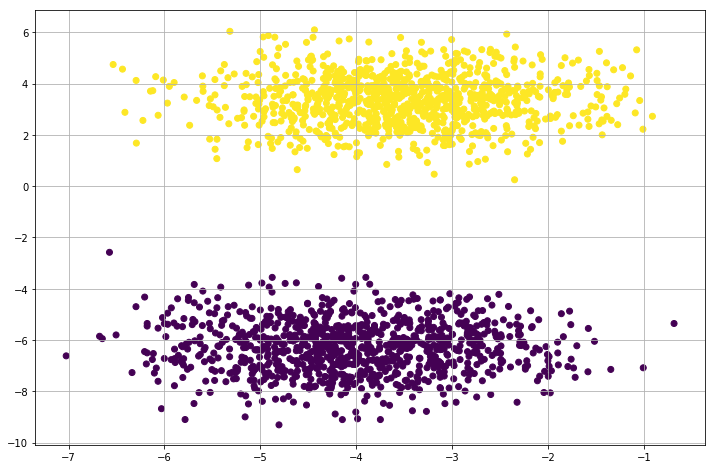

In [46]:
plt.figure(figsize=[12,8])
plt.scatter(x=X01[:,0],y=X01[:,1],c=y01)
plt.grid()
plt.show()

## 3 定义模型

In [47]:
lr01=LogisticRegression(max_iter=100)
lr01

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 4 训练模型

In [48]:
%%time
lr01.fit(X=X01,y=y01)

Wall time: 5 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 5 预测模型

In [51]:
%%time
predict01=lr01.predict(X=X01)

Wall time: 0 ns


In [52]:
predict01[:20]

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0])

## 6 与原有分类对比

In [53]:
y01[:20]

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [55]:
%%time
predict02=lr01.predict_proba(X=X01)

Wall time: 1e+03 µs


In [58]:
predict02[:20]

array([[  9.99848777e-01,   1.51223219e-04],
       [  7.92535891e-06,   9.99992075e-01],
       [  7.27388167e-06,   9.99992726e-01],
       [  6.24853700e-04,   9.99375146e-01],
       [  1.14913624e-05,   9.99988509e-01],
       [  4.51634193e-06,   9.99995484e-01],
       [  9.99997399e-01,   2.60101743e-06],
       [  9.99998825e-01,   1.17483743e-06],
       [  9.99998007e-01,   1.99258364e-06],
       [  9.99983791e-01,   1.62092995e-05],
       [  4.51845586e-05,   9.99954815e-01],
       [  9.99994001e-01,   5.99919248e-06],
       [  2.42494683e-04,   9.99757505e-01],
       [  6.14543016e-04,   9.99385457e-01],
       [  9.99993853e-01,   6.14693164e-06],
       [  9.99672962e-01,   3.27038286e-04],
       [  9.99998427e-01,   1.57270018e-06],
       [  9.99983460e-01,   1.65404979e-05],
       [  9.99961399e-01,   3.86008609e-05],
       [  9.99999743e-01,   2.57325780e-07]])

### 6.1 预测准确率

In [74]:
print '模型准确率：%f %s' % (metrics.accuracy_score(y_true=y01,y_pred=predict01)*100,'%')

模型准确率：100.000000 %


## 7 逻辑回归系数

In [60]:
coef01 = lr01.coef_
intercept01 = lr01.intercept_
classes01=lr01.classes_

### 7.1 展开逻辑回归系数

In [61]:
coef01,coef01[0,0]

(array([[-0.5116921 ,  2.14736601]]), -0.51169209796599535)

In [62]:
intercept01

array([ 0.41387191])

### 7.2画线函数

# 计算公式((i * -w[1] - b) / w[0])
def Y(theat,x):  
    #print theat[0,0],theat[0,1]  
    y = (-1)*(theat[0,0]+theat[0,1]*x)/theat[0,2]  
    return y  

### 7.2 计算原有坐标的值 参考线性公式

In [66]:
X02=((X01[:,0]*-coef01[0,0]-intercept01)/coef01[0,1])
X02[:5],X01[:5,0]

(array([-1.02641578, -1.27846849, -1.19909633, -0.94248283, -0.84478948]),
 array([-3.49862436, -4.55638826, -4.22329521, -3.14639151, -2.73641182]))

In [68]:
X03=np.linspace(-7,1)
y03=((X03*-coef01[0,0]-intercept01)/coef01[0,1])

## 8 图示：逻辑回归分类线

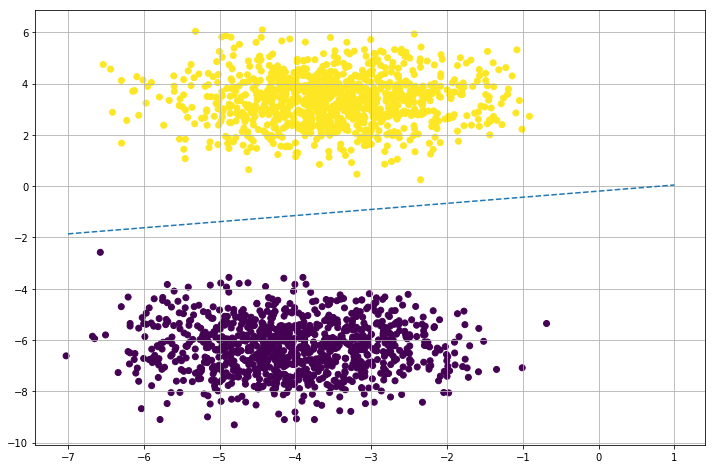

In [70]:
plt.figure(figsize=[12,8])
plt.scatter(x=X01[:,0],y=X01[:,1],c=y01)
#分割线
plt.plot(X03,y03,"--")
plt.xlim()
plt.grid()
plt.show()